<a href="https://colab.research.google.com/github/avs20/SioLabsPython0/blob/main/Chapter%2043%20%3A%20CrossValidation-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np 
import pandas as pd

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X,y  = load_iris(return_X_y = True)


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


def plot_k_accuracy( train_X, train_y,  test_X, test_y):

  accuracy = []
  train_acc = []

  # we check for k from 1 to 10 
  for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    train_pred = model.predict(train_X)
    score = accuracy_score(test_y, preds)
    accuracy.append(score)
    train_acc.append(accuracy_score(train_y, train_pred))


  ax=sns.relplot(x = np.arange(1,100), y = accuracy, kind='line')
  ax=sns.relplot(x = np.arange(1,100), y = train_acc, kind='line')

  ax.set(xlabel = 'K', ylabel='Accuracy')
  plt.show()

  




(150, 4) (150,)


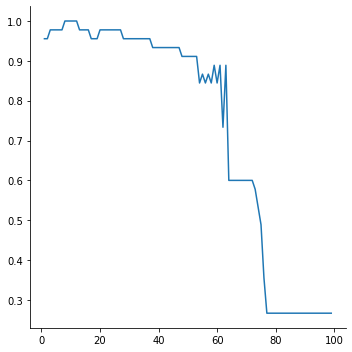

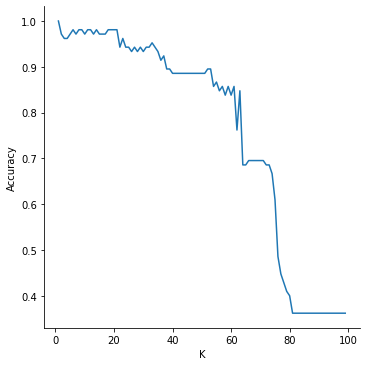

In [ ]:
print(X.shape, y.shape)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 24)


plot_k_accuracy(train_X, train_y, test_X, test_y)

In [ ]:
train_y

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
test_y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

K Fold Cross Validation
----------


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


def plot_k_accuracy( train_X, train_y,  test_X, test_y):

  accuracy = []
  train_acc = []

  # we check for k from 1 to 10 
  for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    score = accuracy_score(test_y, preds)
    accuracy.append(score)



  ax=sns.relplot(x = np.arange(1,100), y = accuracy, kind='line')
  ax.set(xlabel = 'K', ylabel='Accuracy')
  plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5)


In [ ]:
k_dash_fold = 0
results = []

for train_index, test_index in skf.split(X,y):

  k_dash_fold += 1
  # print('k-dash', k_dash_fold)

  train_X = X[train_index, :]
  train_y = y[train_index]
  test_X = X[test_index, :]
  test_y = y[test_index]

  for k in range(1,12):
    # print('k From KNN = ', k)
    result_dict = {}

    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(test_X)
    score = accuracy_score(test_y, preds)
    result_dict['k_dash'] = k_dash_fold
    result_dict['k'] = k
    result_dict['accuracy'] = score
    results.append(result_dict)



results_df = pd.DataFrame(results)

results_df


,k_dash,k,accuracy
0,1,1,0.966667
1,1,2,0.966667
2,1,3,0.966667
3,1,4,0.966667
4,1,5,0.966667
5,1,6,0.966667
6,1,7,0.966667
7,1,8,0.966667
8,1,9,0.966667
9,1,10,0.966667


In [ ]:
results_df.groupby('k')['accuracy'].mean()

k
1     0.960000
2     0.946667
3     0.966667
4     0.973333
5     0.973333
6     0.980000
7     0.980000
8     0.966667
9     0.973333
10    0.980000
11    0.980000
Name: accuracy, dtype: float64

## Final way to do things 

In [ ]:
#1. get the data 

X,y = load_iris(return_X_y = True)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
#split into train and test 
dTrain_x,test_X, dTrain_y,  test_y = train_test_split(X, y , test_size = 0.2, random_state = 24 )



In [ ]:
#split into train and validation 
k_dash_fold = 0
results = []

for train_index, test_index in skf.split(dTrain_x,dTrain_y):

  k_dash_fold += 1
  # print('k-dash', k_dash_fold)

  train_X = X[train_index, :]
  train_y = y[train_index]
  valid_X = X[test_index, :]
  valid_y = y[test_index]

  for k in range(1,12):
    # print('k From KNN = ', k)
    result_dict = {}

    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    score = accuracy_score(valid_y, preds)
    result_dict['k_dash'] = k_dash_fold
    result_dict['k'] = k
    result_dict['accuracy'] = score
    results.append(result_dict)



results_df = pd.DataFrame(results)

results_df.groupby('k')['accuracy'].mean()

k
1     0.941667
2     0.925000
3     0.941667
4     0.916667
5     0.908333
6     0.908333
7     0.908333
8     0.908333
9     0.900000
10    0.866667
11    0.866667
Name: accuracy, dtype: float64

In [ ]:
# now to report accuracy we use k = 3

final_model = KNeighborsClassifier(n_neighbors = 3)
final_model.fit(dTrain_x, dTrain_y)
preds = final_model.predict(test_X)

print('The accuracy of the model is ', accuracy_score(test_y, preds))

The accuracy of the model is  0.9666666666666667


### Using cross_val_score

In [7]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import numpy as np 

In [8]:
# Load Iris and split data 
X,y = load_iris(return_X_y = True)

#split the data 
train_x, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

final_scores = []
for k in range(1,12):
  model = KNeighborsClassifier(n_neighbors = k )
  scores = cross_val_score(model, train_x, train_y, cv = 5, scoring = 'accuracy')
  final_scores.append(scores)
  

In [9]:
final_scores

[array([0.91666667, 1.        , 0.91666667, 0.91666667, 0.95833333]),
 array([0.91666667, 1.        , 0.83333333, 0.91666667, 0.95833333]),
 array([1.        , 1.        , 0.91666667, 0.95833333, 0.95833333]),
 array([1.        , 1.        , 0.83333333, 0.95833333, 0.95833333]),
 array([1.        , 1.        , 0.91666667, 0.95833333, 0.95833333]),
 array([1.        , 1.        , 0.875     , 0.95833333, 0.95833333]),
 array([1.        , 1.        , 0.91666667, 0.95833333, 0.95833333]),
 array([1.        , 1.        , 0.875     , 0.95833333, 1.        ]),
 array([1.        , 1.        , 0.95833333, 0.95833333, 1.        ]),
 array([1.        , 1.        , 0.91666667, 0.95833333, 1.        ]),
 array([1.        , 1.        , 0.95833333, 0.95833333, 1.        ])]

In [10]:
# find the mean of the accuracies for each 
np.mean(final_scores, axis = 1)

array([0.94166667, 0.925     , 0.96666667, 0.95      , 0.96666667,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333])

In [11]:
# convert to numpy array
final_scores = np.asarray(final_scores)

In [12]:
# get the mean accuracy for each value of k 
mean_scores = np.mean(final_scores, axis = 1)

In [13]:
mean_scores

array([0.94166667, 0.925     , 0.96666667, 0.95      , 0.96666667,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333])

In [14]:
# find the index of maximum accuracy 
np.argmax(mean_scores)

8

In [15]:
final_k = np.argmax(mean_scores) + 1


In [17]:
final_model = KNeighborsClassifier(n_neighbors= final_k)
final_model.fit(train_x, train_y)
preds = final_model.predict(test_X)
print("Final Accuracy is :", accuracy_score(test_y, preds) * 100)

Final Accuracy is : 96.66666666666667
